# Assignment 3 

## Objective

The goal is to investigate supervised learning algorithms for article classification on BBC news datasets using NB, kNN, SVM, and NNs. 

## Task 1: Exploratory Data Analytics

### (a) Feature vectorization and summary table

In [1]:
# Load libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train.csv')

# df info
print(df.head(), '\n') # glimpse first few rows
print(df.shape, '\n') # 1000 rows, 3 columns
print(df.info(), '\n') # no missing values 
print(df['Category'].value_counts()) # even distribution of categories


   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment 

(428, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  428 non-null    int64 
 1   Text       428 non-null    object
 2   Category   428 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.2+ KB
None 

Category
tech             216
entertainment    212
Name: count, dtype: int64


In [2]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']) # USE X_tfidf FOR MODEL BUILDING

# Print num articles and features
print("Number of articles:", X_tfidf.shape[0])
print("Number of features (unique words):", X_tfidf.shape[1])

# Show features for 5 articles
feature_names = tfidf_vectorizer.get_feature_names_out()
sample_df = pd.DataFrame(
    X_tfidf[:5].toarray(),
    columns=feature_names[:]
)
sample_df['ArticleId'] = df['ArticleId'][:5].values
sample_df['Category'] = df['Category'][:5].values

print("\nSample of 5 articles with TF-IDF features (first 10 shown):\n")
print(sample_df)

Number of articles: 428
Number of features (unique words): 13518

Sample of 5 articles with TF-IDF features (first 10 shown):

    00       000  000th  001st  0051  007  0100  0130  028   05  ...  zombies  \
0  0.0  0.020115    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
1  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
2  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
3  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
4  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   

   zone  zonealarm  zones  zoom  zooms   zooropa  zorro  ArticleId  \
0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1976   
1   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1797   
2   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1866   
3   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1153   
4   0.0        0.0    0.0   0.0    0

Explanation:

We use `TfidfVectorizer` to convert the news articles into numerical feature vectors based on the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. TF-IDF computes a value for each word in each article based on how frequently the word appears in that article (term frequency) and how rare it is across the entire dataset (inverse document frequency). This helps highlight words that are important for distinguishing one article from another, while down-weighting common words that appear across most documents. 

We choose TF-IDF for model building because it generally improves the performance of classification algorithms like Naive Bayes, kNN, SVM, and Neural Networks by emphasizing informative, distinguishing words. We used TF-IDF in task 1a so that our feature vectors match what will be used by our classifiers. 

However, in task 1b, we use `CountVectorizer` (which gives simple word occurrence counts) for term frequency analysis and plots. This is because term frequency plots are most meaningful when they show raw counts of how often each word appears, which is standard for exploratory data analysis of text. 

Note that news bodies were lower-cased with removal of stop words and special characters, so we do not have to do any further data preprocessing. 

### (b) Term Frequency Analysis and Plots (Counts)


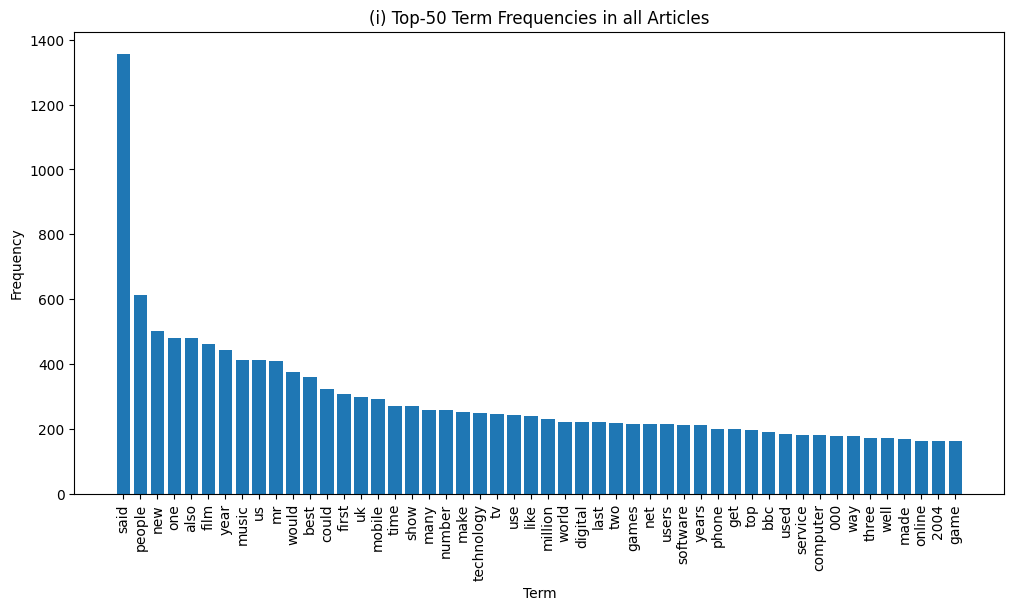

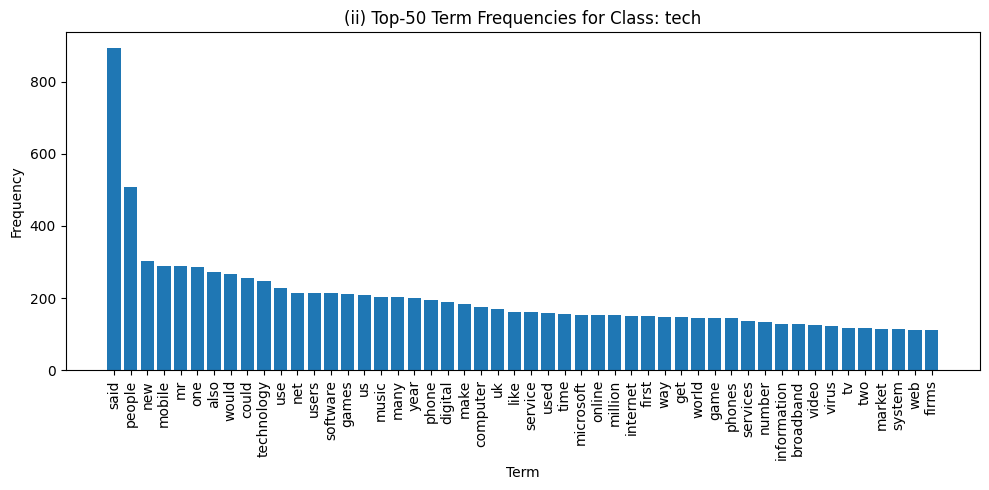

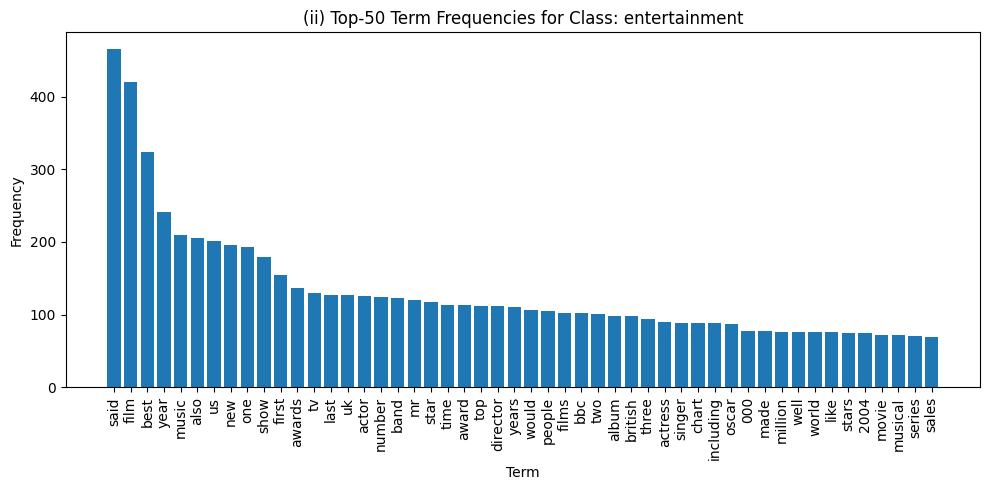

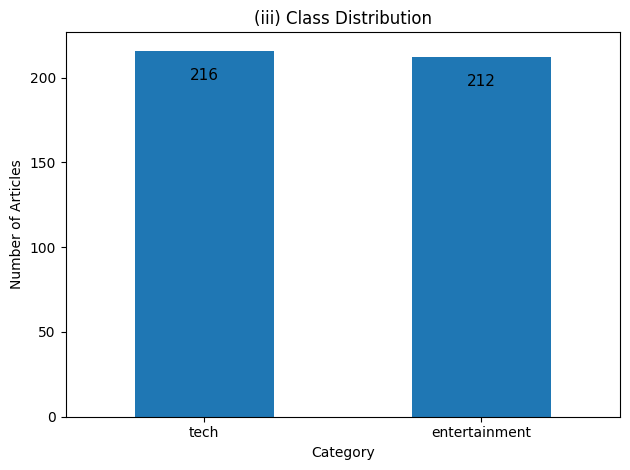

In [3]:
# Raw counts
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['Text'])
word_counts = X_counts.sum(axis=0).A1
terms = count_vectorizer.get_feature_names_out()

### i) Top-50 term distribution
top_50_indices = word_counts.argsort()[::-1][:50]
top_50_terms = terms[top_50_indices]
#print(top_50_terms)
top_50_counts = word_counts[top_50_indices]
#print(top_50_counts)
plt.figure(figsize=(12, 6))
plt.bar(top_50_terms, top_50_counts)
plt.xticks(rotation=90)
plt.title("(i) Top-50 Term Frequencies in all Articles")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

### ii) Term frequency per class
for cat in df['Category'].unique():
    mask = (df['Category'] == cat).values
    class_counts = X_counts[mask].sum(axis=0).A1
    top_50_indices = class_counts.argsort()[::-1][:50]
    plt.figure(figsize=(10, 5))
    plt.bar(terms[top_50_indices], class_counts[top_50_indices])
    plt.xticks(rotation=90)
    plt.title(f"(ii) Top-50 Term Frequencies for Class: {cat}")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
### iii) Class distribution
class_counts = df['Category'].value_counts()
ax = class_counts.plot(kind='bar')
plt.title('(iii) Class Distribution')
plt.ylabel('Number of Articles')
plt.xlabel('Category')
plt.xticks(rotation=0)

# text labels
for i, v in enumerate(class_counts):
    plt.text(
        i, # bar center
        v - 10, # height 
        str(v), # text 
        ha='center', # horiz aligned center
        va='top', # vert aligned top
        fontsize=11
    )
plt.tight_layout()
plt.show()


Comments on the plots:

**(i) Top-50 Term Frequencies in all Articles**
The first plot shows the 50 most frequenct terms across the entire BBC news dataset. Words like "said", "people", and "new" appear at the top, reflecting common themes and reporting styles in the news articles. "Said" is by far the most frequent word, likely because news articles often quote sources or interviewees. While some domain-specific words (such as "music", "film", or "mobile") are present, many frequenct words are common reporting words used in both tech and entertainment articles. 

**(ii) Top-50 Term Frequencies by Class**
- The top terms in tech articles include "mobile", "technology", "users", "software", "games", "phone" etc. which are strongly indicative of technology topics. This suggests that the dataset is well-separated. 

- In contrast, the most frequenct words in entertainment articles are "film", "music", "show", "awards", "actor", "band" etc. which clearly reflects the topics covered in this class. 

While there is some overlap in common words (such as "said", "year", and "tv"), the most distinguishing terms for each class clearly align with their respective domains e.g. "mobile" and "technology" are prominent in tech while "film" and "music" dominate entertainment. 

**(iii) Class distribution**
The final plot shows the distribution of articles by class. The dataset is almost perfectly balanced, with 216 tech articles and 212 entertainment articles. This balanced distribution is advantageous for supervised machine learning, as it will help models learn both classes equally well and prevent bias towards either category. 

## Task 2: Classification Models Learning

### (a) Naive Bayes (NB)


(i) Top-20 most identifiable words overall (highest P(X_w=1|Y=y) combined across classes):
1. said (Combined P=0.0012)
2. film (Combined P=0.0009)
3. people (Combined P=0.0008)
4. best (Combined P=0.0008)
5. music (Combined P=0.0007)
6. us (Combined P=0.0007)
7. new (Combined P=0.0007)
8. year (Combined P=0.0006)
9. mr (Combined P=0.0006)
10. mobile (Combined P=0.0006)
11. one (Combined P=0.0006)
12. also (Combined P=0.0006)
13. show (Combined P=0.0006)
14. uk (Combined P=0.0006)
15. number (Combined P=0.0005)
16. would (Combined P=0.0005)
17. tv (Combined P=0.0005)
18. first (Combined P=0.0005)
19. could (Combined P=0.0005)
20. games (Combined P=0.0005)


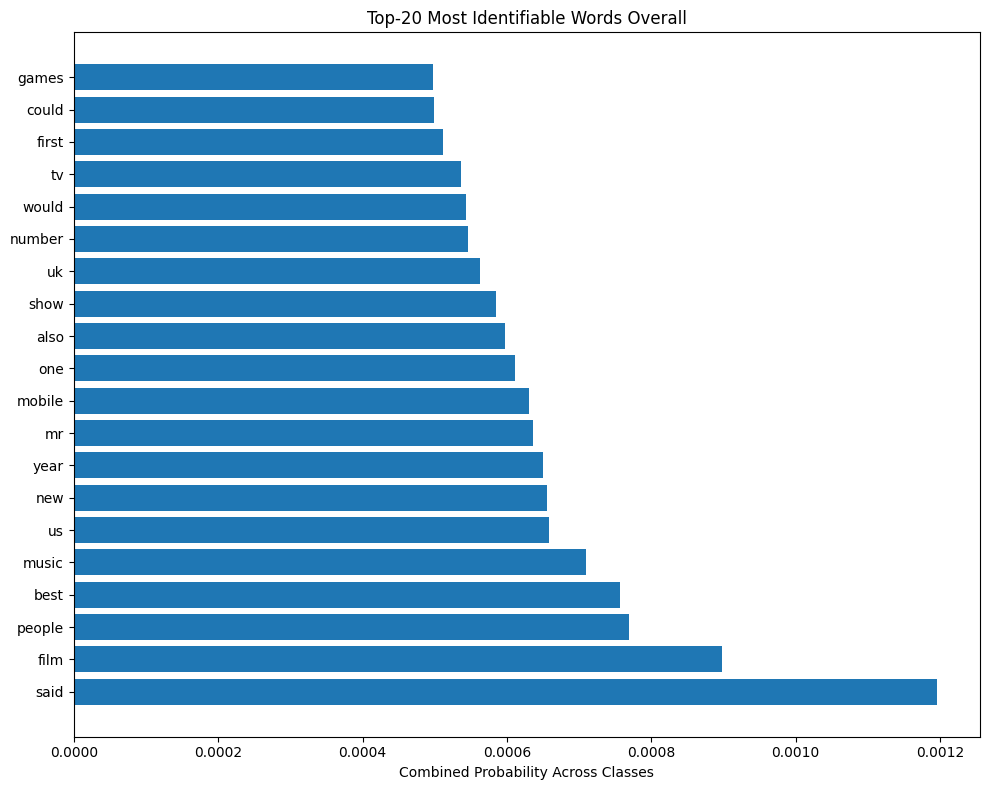


(ii) Top-20 words with highest ratio overall:
1. mobile (Ratio=8.38, Class=tech)
2. film (Ratio=6.72, Class=entertainment)
3. software (Ratio=6.68, Class=tech)
4. users (Ratio=6.09, Class=tech)
5. band (Ratio=6.06, Class=entertainment)
6. microsoft (Ratio=6.01, Class=tech)
7. games (Ratio=5.99, Class=tech)
8. net (Ratio=5.95, Class=tech)
9. technology (Ratio=5.78, Class=tech)
10. virus (Ratio=5.68, Class=tech)
11. phone (Ratio=5.64, Class=tech)
12. broadband (Ratio=5.60, Class=tech)
13. best (Ratio=5.35, Class=entertainment)
14. computer (Ratio=5.22, Class=tech)
15. actor (Ratio=5.04, Class=entertainment)
16. phones (Ratio=4.98, Class=tech)
17. album (Ratio=4.98, Class=entertainment)
18. chart (Ratio=4.79, Class=entertainment)
19. oscar (Ratio=4.69, Class=entertainment)
20. spam (Ratio=4.57, Class=tech)


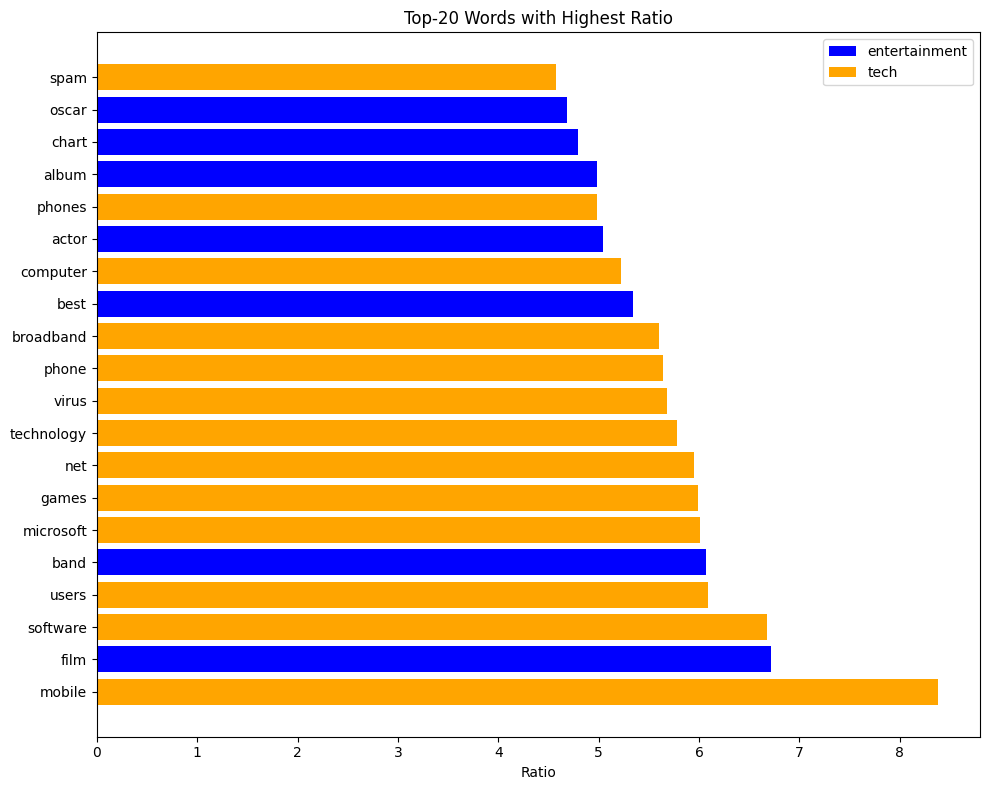

In [4]:
# Code goes here
import numpy as np
from sklearn.naive_bayes import MultinomialNB

x = X_tfidf
y = df['Category']

# Train Naive Bayes classifier on the entire dataset
nb_classifier = MultinomialNB()
nb_classifier.fit(x, y)

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extract the feature probabilities for each class
classes = nb_classifier.classes_
feature_log_probs = nb_classifier.feature_log_prob_
feature_probs = np.exp(feature_log_probs)  # Convert from log probabilities to actual probabilities

# Part (i): Top-20 most identifiable words overall

# Combine probabilities from both classes to find the most likely words overall
combined_probs = feature_probs.sum(axis=0)
top_indices = combined_probs.argsort()[::-1][:20]
top_words = [(feature_names[idx], combined_probs[idx]) for idx in top_indices]

print("\n(i) Top-20 most identifiable words overall (highest P(X_w=1|Y=y) combined across classes):")
for j, (word, prob) in enumerate(top_words, 1):
    print(f"{j}. {word} (Combined P={prob:.4f})")

# Visualize the top-20 most identifiable words overall
plt.figure(figsize=(10, 8))
words = [word for word, _ in top_words]
probs = [prob for _, prob in top_words]
plt.barh(range(len(words)), probs, align='center')
plt.yticks(range(len(words)), words)
plt.title('Top-20 Most Identifiable Words Overall')
plt.xlabel('Combined Probability Across Classes')
plt.tight_layout()
plt.show()

# Part (ii): Top-20 words with highest ratio overall

# For each word, find the maximum ratio across classes
all_ratios = []
for idx in range(len(feature_names)):
    # Calculate ratios for both class directions
    ratio_tech = feature_probs[0][idx] / (feature_probs[1][idx] + 1e-10)
    ratio_ent = feature_probs[1][idx] / (feature_probs[0][idx] + 1e-10)
    
    # Take the maximum ratio and record which class it is
    if ratio_tech > ratio_ent:
        all_ratios.append((feature_names[idx], ratio_tech, classes[0]))
    else:
        all_ratios.append((feature_names[idx], ratio_ent, classes[1]))

# Sort by ratio and take top 20
all_ratios.sort(key=lambda x: x[1], reverse=True)
top_discriminative = all_ratios[:20]

print("\n(ii) Top-20 words with highest ratio overall:")
for j, (word, ratio, category) in enumerate(top_discriminative, 1):
    print(f"{j}. {word} (Ratio={ratio:.2f}, Class={category})")

# Visualize the top words with highest ratio
plt.figure(figsize=(10, 8))
words = [word for word, _, _ in top_discriminative]
ratios = [ratio for _, ratio, _ in top_discriminative]
# Color bars based on class
colors = ['blue' if cat == classes[0] else 'orange' for _, _, cat in top_discriminative]

plt.barh(range(len(words)), ratios, align='center', color=colors)
plt.yticks(range(len(words)), words)
plt.title('Top-20 Words with Highest Ratio')
plt.xlabel('Ratio')

#legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label=classes[0]),
    Patch(facecolor='orange', label=classes[1])
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

Q: Which list of words describe the two classes better? Briefly explain your reasoning.

A: the words in the first list (i), such as “said”, “new”, and “people”, while frequent they are generic and appear in both types of articles as they are common words in most english sentences. this means that it is less informative about the topic class the second list (ii) provides a clearer separation between tech and entertainment categories.

The list based on the ratio (ii) better describes the two classes as the words are selected because they are more likely in one class than the other, therefore making them more useful for classification.
words like “mobile”, “software”, and “microsoft” point to tech-related content, while “film”, “actor”, and “album” point to entertainment-related content.

### (b) kNN

In [5]:
# Code goes here

### (c) SVM

In [6]:
# Code goes here

### (d) NN

In [7]:
# Code goes here

## Task 3: Classification Quality Evaluation

### (a) Training Set Size vs Accuracy

*For each model, we are evaluating how accuracy (F1 score) varies with training set size, and plotting all 4 models' curves on the same pair of plots (training and testing accuracy)*


Classification Results:

   Fraction  Training Size  Train F1   Test F1
0       0.1             42  1.000000  0.559822
1       0.3            128  0.992246  0.981533
2       0.5            214  0.995349  0.963802
3       0.7            299  0.996667  0.963802
4       0.9            385  0.994805  0.972582

Training F1 Scores: [1.0, 0.9922457988130913, 0.995349354197689, 0.9966671310426931, 0.9948051948051949]
Test F1 Scores: [0.5598224362778794, 0.981533356484161, 0.9638019282521352, 0.9638019282521352, 0.9725817428952171]


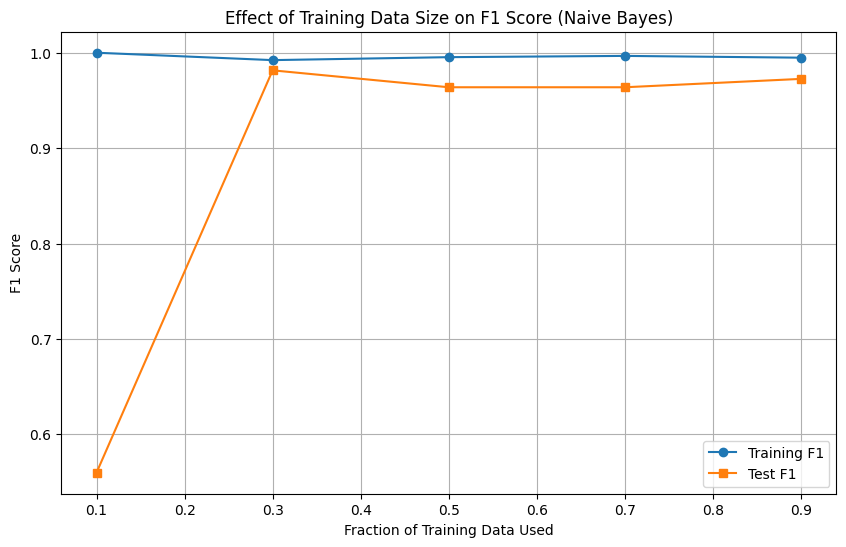

In [8]:
# Code goes here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# F1 scores stored here for plotting
train_f1_scores = []
test_f1_scores = []

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare features and labels
X_train_full = train_df['Text'].values
y_train_full = train_df['Category'].values
X_test = test_df['Text'].values
y_test = test_df['Category'].values

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Transform the entire training data to get the vocabulary
X_train_full_transformed = vectorizer.fit_transform(X_train_full)
X_test_transformed = vectorizer.transform(X_test)

# Total number of samples in training set
N = len(X_train_full)

# Define the fractions of data to use for training
fractions = [0.1, 0.3, 0.5, 0.7, 0.9]
results = []

# Custom F1 calculation
def calculate_f1(precision, recall):
    return 2 * ((precision * recall) / (precision + recall))

# Main loop
for m in fractions:
    # Calculate how many samples to use for training
    train_size = int(m * N)
    
    # Use first m*N samples for training
    X_train_subset = X_train_full_transformed[:train_size]
    y_train_subset = y_train_full[:train_size]
    
    # Train the classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_subset, y_train_subset)
    
    # Evaluate training F1 on the training subset (the data it was trained on)
    train_pred = classifier.predict(X_train_subset)
    train_precision = precision_score(y_train_subset, train_pred, average='weighted')
    train_recall = recall_score(y_train_subset, train_pred, average='weighted')
    train_f1 = calculate_f1(train_precision, train_recall)
    
    # Evaluate testing F1 on the full test set
    test_pred = classifier.predict(X_test_transformed)
    test_precision = precision_score(y_test, test_pred, average='weighted')
    test_recall = recall_score(y_test, test_pred, average='weighted')
    test_f1 = calculate_f1(test_precision, test_recall)
    
    # Save F1 scores for plotting
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

    
#
#everything past here can be deleted, only used to show results in a plot
#

    # Store results for table
    results.append({
        'Fraction': m,
        'Training Size': train_size,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })

# Display results table
results_df = pd.DataFrame(results)
print("Classification Results:\n")
print(results_df[['Fraction', 'Training Size', 'Train F1', 'Test F1']])

# Print raw F1 score lists (optional)
print("\nTraining F1 Scores:", train_f1_scores)
print("Test F1 Scores:", test_f1_scores)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot([r['Fraction'] for r in results], [r['Train F1'] for r in results], marker='o', label='Training F1')
plt.plot([r['Fraction'] for r in results], [r['Test F1'] for r in results], marker='s', label='Test F1')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('F1 Score')
plt.title('Effect of Training Data Size on F1 Score (Naive Bayes)')
plt.legend()
plt.grid(True)
plt.show()


### (b) Hyperparameter Impact
*For each model, we are listing the major hyperparameters, assessing their impact (using CV) and comparing them as a set in our discussion*


In [9]:
# Code goes here

### (c) Best Results Comparison
*Here, after tuning, we are reporting and comparing the best performance (F1) of each model and summarizing which works best*